In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train_df = pd.read_excel("data/train.xlsx")
test1_df = pd.read_excel("data/testA.xlsx")
test2_df = pd.read_excel("data/testB.xlsx")

In [3]:
train_y = train_df[train_df.columns[-1]]
train_y.shape

(800,)

In [4]:
train_df = train_df[train_y>1.8]
train_y = train_y[train_y>1.8]
print(train_df.shape, train_y.shape)

(799, 5954) (799,)


In [5]:
new_column = test1_df.columns
train_df = train_df[new_column]
train_id = train_df['ID']
test1_id = test1_df['ID']
test2_id = test2_df['ID']
train_df.drop(['ID'], axis=1, inplace=True)
test1_df.drop(['ID'], axis=1, inplace=True)
test2_df.drop(['ID'], axis=1, inplace=True)

In [6]:
test1y = pd.read_csv('data/testAy.csv', header=None)
test1y.shape

(300, 2)

In [7]:
test1y = test1y.values[:, 1]

In [8]:
dfX = pd.concat([train_df, test1_df, test2_df], axis=0)
dfX.shape

(1511, 5952)

In [9]:
names = train_df.columns
dts = train_df.dtypes
drop_names = []
dn2 = []
objs = []
for i in range(len(names)):
    n = names[i]
    d = str(dts[i])
    if 'obj' in d:
        objs.append(n)
    else:
        c = dfX[n]
        r = c[c.notnull()]
        c1 = c[:799]
        c2 = c[799:1099]
        c3 = c[1099:]
        r1 = c1[c1.notnull()]
        r2 = c2[c2.notnull()]
        r3 = c3[c3.notnull()]
        if len(r) < 1000 or len(r1)<480 or len(r2)<180 or len(r3)<248:
            drop_names.append(n)
        else:
            tmpm = np.mean(r)
            tmps = np.std(r)
            tmpm1 = np.mean(r1)
            tmps1 = np.std(r1)
            tmpm2 = np.mean(r2)
            tmps2 = np.std(r2)
            tmpm3 = np.mean(r3)
            tmps3 = np.std(r3)
            if np.abs(tmps) == 0 or np.abs(tmps1)==0 or np.abs(tmps2)==0 or np.abs(tmps3)==0:
                drop_names.append(n)
            elif tmps < 1e-5 or tmps1<1e-5 or tmps2<1e-5 or tmps3<1e-5 or np.max(r)==np.min(r) or np.max(r1)==np.min(r1) or np.max(r2)==np.min(r2) or np.max(r3)==np.min(r3):
                print(n, tmpm, tmps, np.max(r), np.min(r))
                dn2.append(n)
print(len(drop_names), len(dn2))            

210X225 0.022425545996029757 0.0012921577653821725 0.0225 0.0
300X16 6.300000000000021 2.1316282072803006e-14 6.3 6.3
310X161 0.1715000575777681 0.039919891054378404 0.305521 -0.229141
310X162 0.15700705956319758 0.013680947834524388 0.232323 0.15257
310X163 0.15199984315023715 0.019271361022436626 0.153589 -0.153053
310X164 0.17201277895433215 0.03320377177262633 0.30542 0.153653
310X166 0.15377082594309 0.002849041662371128 0.230827 0.152786
311X144 1.2999999999999685 3.1530333899354446e-14 1.3 1.3
312X161 3.099999999999985 1.509903313490213e-14 3.1 3.1
312X162 18.399129852744746 0.009287495320179215 18.4 18.3
312X179 3.099999999999985 1.509903313490213e-14 3.1 3.1
312X180 18.400000000000436 4.369837824924616e-13 18.4 18.4
312X183 3.397731821214123 0.08778760297963373 3.4 0.0
312X184 3.3999999999999813 1.865174681370263e-14 3.4 3.4
312X185 23.20000000000033 3.304023721284466e-13 23.2 23.2
312X190 3.3999999999999813 1.865174681370263e-14 3.4 3.4
312X195 3.397731821214123 0.08778760297

In [10]:
dfX.drop(drop_names, axis=1, inplace=True)
dfX.shape

(1511, 4808)

In [11]:
dfX.drop(dn2, axis=1, inplace=True)
dfX.shape

(1511, 4734)

In [12]:
dfxobj = dfX[objs]
dfX.drop(objs, axis=1, inplace=True)
print(dfX.shape)
print(dfxobj.shape)

(1511, 4723)
(1511, 11)


In [13]:
years = []
for n in dfX.columns:
    c = dfX[n]
    r = c[c.notnull()]
    r1 = r.astype(np.int64).values
    if (str(r1[0])[:4] == '2017' and str(r1[-1])[:4] == '2017') or (str(r1[0])[:4] == '2016' and str(r1[-1])[:4] == '2016'):
        years.append(n)
print(len(years))

90


In [14]:
dfXyear = dfX[years]
dfX.drop(years, axis=1, inplace=True)
print(dfXyear.shape)
print(dfX.shape)

(1511, 90)
(1511, 4633)


In [15]:
for n in years:
    c = dfXyear[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    dfXyear[n][c.isnull()] = tmpm
print(np.sum(dfXyear.isnull().values))

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/magnusterra/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0


In [16]:
names = dfXyear.columns
standardc = dfXyear[names[0]]
tmpst = standardc.values[0]
for i in range(1, len(names)):
    c = dfXyear[names[i]]
    tmp0 = c.values[0]
    ratio = tmp0/tmpst
    if ratio < 0.01:
        dfXyear[n] *= 1000000

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
for n in names:
    dfXyear[n] = dfXyear[n].astype(np.int64)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
dfx_days = copy.copy(dfXyear)

In [29]:
tooshorttimes = []
for n in dfx_days.columns:
    x = len(set(dfx_days[n].values))
    if x < 100:
        tooshorttimes.append(n)
        print(n, x)
print(len(tooshorttimes))

210X205 50
210X213 16
210X215 42
3


In [20]:
print(dfx_days.shape)
dfx_days.drop(['750X1293'], axis=1, inplace=True)
print(dfx_days.shape)

(1511, 90)
(1511, 89)


In [21]:
day_n = dfx_days.columns
standardcolumn = copy.copy(dfx_days[day_n[1]])
standardlen = len(str(standardcolumn[0]))
print(standardlen)
drop_names = []
for i in range(len(day_n)):
    #if i == 1:
    #    print(i, "standard")
    #    continue
    l = len(str(dfx_days[day_n[i]][0]))
    bias = standardlen - l
    b10 = 1
    if bias > 0:
        for j in range(bias):
            b10 *= 10
    elif bias < 0:
        for j in range(-bias):
            b10 /= 10
    print(i, l, bias, b10)
    if b10 != 1:
        dfx_days[day_n[i]] *= b10
    dfx_days[day_n[i]] = dfx_days[day_n[i]] - standardcolumn
    if np.sum(dfx_days[day_n[i]]) == 0:
        drop_names.append(day_n[i])
print(drop_names)

87
0 86 1 10
1 87 0 1
2 87 0 1
3 87 0 1
4 87 0 1
5 92 -5 1e-05
6 92 -5 1e-05
7 92 -5 1e-05
8 92 -5 1e-05
9 92 -5 1e-05
10 92 -5 1e-05
11 92 -5 1e-05
12 92 -5 1e-05
13 85 2 100
14 85 2 100
15 85 2 100
16 85 2 100
17 85 2 100
18 85 2 100
19 86 1 10
20 86 1 10
21 86 1 10
22 86 1 10
23 92 -5 1e-05
24 92 -5 1e-05
25 92 -5 1e-05
26 92 -5 1e-05
27 92 -5 1e-05
28 92 -5 1e-05
29 92 -5 1e-05
30 92 -5 1e-05
31 85 2 100
32 85 2 100
33 86 1 10
34 86 1 10
35 86 1 10
36 86 1 10
37 86 1 10
38 86 1 10
39 86 1 10
40 86 1 10
41 87 0 1
42 87 0 1
43 87 0 1
44 87 0 1
45 69 18 1000000000000000000
46 69 18 1000000000000000000
47 70 17 100000000000000000
48 70 17 100000000000000000
49 70 17 100000000000000000
50 69 18 1000000000000000000
51 69 18 1000000000000000000
52 70 17 100000000000000000
53 70 17 100000000000000000
54 70 17 100000000000000000
55 70 17 100000000000000000
56 85 2 100
57 85 2 100
58 86 1 10
59 86 1 10
60 86 1 10
61 86 1 10
62 86 1 10
63 86 1 10
64 86 1 10
65 86 1 10
66 87 0 1
67 87 0 1
68 8

In [22]:
print(dfx_days.shape)
dfx_days.drop(['210X204'], axis=1, inplace=True)
print(dfx_days.shape)

(1511, 89)
(1511, 88)


In [23]:
# normalize time
names = dfx_days.columns
for n in names:
    c = dfx_days[n]
    tmpm = np.mean(c)
    tmps = np.std(c)
    dfx_days[n] = (dfx_days[n] - tmpm) / tmps

In [30]:
dfx_ts = dfx_days[tooshorttimes]
print(dfx_ts.shape)

(1511, 3)


In [31]:
names = dfx_ts.columns
for n in names:
    c = dfx_ts[n]
    tmpm = np.mean(c)
    tmps = np.std(c)
    dfx_ts[n] = (dfx_ts[n] - tmpm) / tmps

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# manipulate int
names = dfX.columns
dtypes = dfX.dtypes
ints = []
floats = []
print(dfX.shape)
for i in range(len(names)):
    n = names[i]
    d = str(dtypes[i])
    if 'int' in d:
        ints.append(n)
    else:
        floats.append(n)
print(len(ints), len(floats))

(1511, 4633)
199 4434


In [33]:
for n in dfx_ts.columns:
    c = dfx_ts[n].values
    tmpm = np.mean(c)
    if tmpm == 0:
        print(n)

In [36]:
print(dfx_days.shape)
dfx_days = pd.concat([dfx_days, dfx_ts], axis=1)
print(dfx_days.shape)

(1511, 88)
(1511, 91)


In [37]:
# manipulate ints
dfxints = dfX[ints]
print(dfxints.shape)

(1511, 199)


In [38]:
dfxints = pd.concat([dfxints, dfxobj], axis=1)
print(dfxints.shape)

(1511, 210)


In [42]:
float2int = []
for n in floats:
    c = dfX[n]
    if np.sum(c.isnull().values) == 0:
        x = len(set(c.values))
        if x < 10:
            float2int.append(n)
print(len(float2int))

289


In [43]:
dfxints = pd.concat([dfxints, dfX[float2int]], axis=1)
print(dfxints.shape)

(1511, 499)


In [44]:
remains1 = []
remains2 = []
tobedrop = []

for n in dfxints.columns:
    lu1 = len(dfxints[:799][n].unique())
    lu2 = len(dfxints[n].unique())
    if lu1 < 15 and lu1 > 1:
        remains1.append(n)
    if lu2 < 15 and lu2 > 1:
        remains2.append(n)
    if lu2 > 30:
        #print(lu1, lu2)
        tobedrop.append(n)
    
print(len(remains1), len(remains2), len(tobedrop))

391 387 61


In [45]:
toberemain = list(set(remains1) & set(remains2) - set(tobedrop))
print(len(toberemain))

387


In [46]:
def dict2list(dic:dict):
    ''' 将字典转化为列表 '''
    keys = dic.keys()
    vals = dic.values()
    lst = [(key, val) for key, val in zip(keys, vals)]
    return lst

def LastRemainJudge(column):
    unique = set(column)
    uf = {}
    for u in unique:
        uf[u] = 0
    for c in column:
        uf[c] += 1
    sl = sorted(dict2list(uf), key = lambda x:x[1], reverse=True)
    x = sl[0][1]/len(column)
    sl = np.array(sl)
    if x < 0.85:
        #print(sl[:, 1]/len(column))
        return True
    else:
        return False

In [47]:
lm1 = []
lm2 = []
for n in toberemain:
    if LastRemainJudge(dfxints[:799][n]):
        lm1.append(n)
    if LastRemainJudge(dfxints[n]):
        lm2.append(n)
print(len(lm1), len(lm2), len(set(lm1)&set(lm2)))

332 342 330


In [48]:
dfx_onehot_n = list(set(lm1) & set(lm2))

In [49]:
dfx_onehot = dfxints[dfx_onehot_n]
print(dfx_onehot.shape)

(1511, 330)


In [50]:
# make onehots onehot
ohnames = dfx_onehot.columns
for i in range(len(ohnames)):
    n = ohnames[i]
    tmp = pd.get_dummies(dfx_onehot[n], prefix='onehot_'+str(i))
    dfx_onehot = pd.concat([dfx_onehot, tmp], axis=1)
print(dfx_onehot.shape)

(1511, 2111)


In [51]:
dfx_onehot.drop(ohnames, axis=1, inplace=True)
print(dfx_onehot.shape)

(1511, 1781)


In [52]:
# manipulate floats
dfxfloats = dfX[floats]
print(dfxfloats.shape)

(1511, 4434)


In [53]:
change_names1 = []
change_names2 = []
change_names3 = []
for n in dfxfloats.columns:
    c = dfxfloats[n]
    r = c[c.notnull()]
    if len(set(r))<=3:
        continue
    x = np.sort(list(set(r)))
    max1 = x[-1] - x[-2]
    max2 = x[-2] - x[-3]
    min1 = x[1] - x[0]
    min2 = x[2] - x[1]
    if (max1 > 0 and max2==0) or (min1>0 and min2==0):
        change_names1.append(n)
    else:
        if (max2>0 and max1/max2>=7.3891):
            change_names2.append(n)
            newmax1 = x[-2] + max2
            dfxfloats[n][c.notnull()][r==x[-1]] = newmax1
        if (min2>0 and min1/min2>=7.3891):
            change_names3.append(n)
            newmin1 = x[1] - min2
            dfxfloats[n][c.notnull()][r==x[0]] = newmin1
print(len(change_names1), len(change_names2), len(change_names3))

0 504 700


978


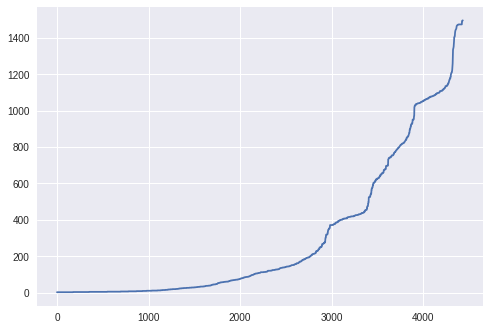

In [54]:
# get the shorts
floatsetlength = []
for n in dfxfloats.columns:
    c = dfxfloats[n]
    r = c[c.notnull()].values
    x = len(set(r))
    floatsetlength.append(x)
floatsetlength = np.sort(floatsetlength)
print(np.sum(floatsetlength<10))
plt.plot(np.arange(len(floatsetlength)), floatsetlength)
plt.show()

In [55]:
means = []
stds = []
drop_names = []
names = dfxfloats.columns
for n in names:
    c = dfxfloats[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    means.append(tmpm)
    stds.append(tmps)
    if tmps == 0:
        drop_names.append(n)
print(len(set(means)), len(set(stds)))
print(len(drop_names))

2272 2257
0


In [56]:
names = dfxfloats.columns
added = set()
sames = []
for i in range(len(names)):
    tmpsl = []
    tmpsl.append(i)
    for j in range(i+1, len(names)):
        if means[i] == means[j] and stds[i] == stds[j]:
            if i not in added:
                added.add(i)
            if j not in added:
                added.add(j)
                tmpsl.append(j)
    if len(tmpsl) > 1:
        sames.append(tmpsl)
print(len(sames))

670


In [57]:
names = dfxfloats.columns
drop_names = []
for i in sames:
    for j in i[1:]:
        drop_names.append(names[j])
print(len(drop_names))

2160


In [58]:
dfxfloats.drop(drop_names, axis=1, inplace=True)
dfxfloats.shape

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1511, 2274)

In [59]:
count = 0
for n in dfxfloats.columns:
    c = dfxfloats[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    dfxfloats[n][c.isnull()] = tmpm
    count += 1
    if count % 100 == 0:
        print(count)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [141]:
drop_names = []
ratio = 0.2
for n in dfxfloats.columns:
    c = dfxfloats[n]
    c1 = c[:799].values
    c2 = c[799:1099].values
    c3 = c[1099:].values
    #tmpm = np.mean(c.values)
    #tmps = np.std(c.values)
    tmpm1 = np.mean(c1)
    tmps1 = np.mean(c1)
    tmpm2 = np.mean(c2)
    tmps2 = np.mean(c2)
    tmpm3 = np.mean(c3)
    tmps3 = np.mean(c3)
    if (np.abs(tmpm1-tmpm2)/tmpm1 > ratio and np.abs(tmps1-tmps2)/tmps1 > ratio) or (np.abs(tmpm1-tmpm3)/tmpm1 > ratio and np.abs(tmps1-tmps3)/tmps1 > ratio):
        drop_names.append(n)
print(len(drop_names))

258


In [142]:
dfxfdr = dfxfloats.drop(drop_names, axis=1)
print(dfxfdr.shape, dfxfloats.shape)

(1511, 2016) (1511, 2274)


In [143]:
dfxlog1p = np.log(dfxfdr-np.min(dfxfdr)+1)
dfxlog1p = (dfxlog1p-np.mean(dfxlog1p))/np.std(dfxlog1p)

In [144]:
ndfx = pd.concat((dfxlog1p, dfx_onehot, dfx_days), axis=1)
print(ndfx.shape)

(1511, 3888)


In [156]:
xgb = XGBRegressor(gamma=0.1, max_depth=3, objective='reg:linear', subsample=0.95) 
xgb.fit(ndfx[:799].values, train_y.values) 
test1_pred = xgb.predict(ndfx[:799].values) 
print(MSE(test1_pred, train_y.values)) 
test1_pred = xgb.predict(ndfx[799:1099].values) 
print(MSE(test1_pred, test1y))
xgb = XGBRegressor(gamma=0.1, max_depth=3, objective='reg:linear', subsample=0.95) 
ny = np.concatenate([train_y.values, test1y], axis=0)
xgb.fit(ndfx[:1099].values, ny) 
test1_pred = xgb.predict(ndfx[1099:].values)
test1_pred = test1_pred.reshape(412)
save = pd.DataFrame({'ID':test2_id, 'value':test1_pred})
save.to_csv('answer/b_Synchronous_logohtime_xgb_20180128_2.csv', index=False, header=False)

0.00514022741207
0.030491993233992924


In [146]:
xgb = XGBRegressor(gamma=0.001, max_depth=3, objective='reg:linear', subsample=0.95)
xgb.fit(ndfx[:799].values, train_y.values)
test1_pred = xgb.predict(ndfx[:799].values)
print(MSE(test1_pred, train_y.values))
test1_pred = xgb.predict(ndfx[799:1099].values)
print(MSE(test1_pred, test1y))

0.00274756868188
0.032497758324087744


In [78]:
def MSE(y_raw, y_pred):
    return np.mean(np.square(y_raw-y_pred))

In [79]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV 

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [96]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=2018)
def get_oof(rgr, xtrain, ytrain, xtest, lenot):
    oof_train = np.zeros((lenot,))
    oof_test = np.zeros((100,))
    oof_test_skf = np.empty((5, 100))
    for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
        kf_xtrain = xtrain[train_index]
        kf_ytrain = ytrain[train_index]
        kf_xtest = xtrain[test_index]
        rgr.fit(kf_xtrain, kf_ytrain)
        oof_train[test_index] = rgr.predict(kf_xtest)
        oof_test_skf[i, : ] = rgr.predict(xtest)
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)